In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/training_setA.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/p015337.psv    
  inflating: training/p015338.psv    
  inflating: training/p015339.psv    
  inflating: training/p015340.psv    
  inflating: training/p015341.psv    
  inflating: training/p015342.psv    
  inflating: training/p015343.psv    
  inflating: training/p015344.psv    
  inflating: training/p015345.psv    
  inflating: training/p015346.psv    
  inflating: training/p015347.psv    
  inflating: training/p015348.psv    
  inflating: training/p015349.psv    
  inflating: training/p015350.psv    
  inflating: training/p015351.psv    
  inflating: training/p015352.psv    
  inflating: training/p015353.psv    
  inflating: training/p015354.psv    
  inflating: training/p015355.psv    
  inflating: training/p015356.psv    
  inflating: training/p015357.psv    
  inflating: training/p015358.psv    
  inflating: training/p015359.psv    
  inflating: training/p015360.psv    
  inflating: training/p015361.psv    

In [ ]:
!unzip /content/drive/MyDrive/training_setB.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_setB/p105248.psv  
  inflating: training_setB/p119895.psv  
  inflating: training_setB/p110252.psv  
  inflating: training_setB/p101807.psv  
  inflating: training_setB/p106684.psv  
  inflating: training_setB/p102400.psv  
  inflating: training_setB/p102464.psv  
  inflating: training_setB/p105348.psv  
  inflating: training_setB/p106064.psv  
  inflating: training_setB/p114430.psv  
  inflating: training_setB/p115936.psv  
  inflating: training_setB/p109493.psv  
  inflating: training_setB/p108817.psv  
  inflating: training_setB/p116788.psv  
  inflating: training_setB/p107049.psv  
  inflating: training_setB/p106130.psv  
  inflating: training_setB/p100185.psv  
  inflating: training_setB/p113392.psv  
  inflating: training_setB/p110158.psv  
  inflating: training_setB/p111052.psv  
  inflating: training_setB/p101978.psv  
  inflating: training_setB/p114012.psv  
  inflating: training_setB/p106347.psv  
  infl

In [ ]:
from os import listdir
import numpy as np
import pandas as pd

In [ ]:
training_a = sorted(listdir('/content/training'))

training_b = sorted(listdir('/content/training_setB/'))

In [ ]:
len(training_a), len(training_b)

(20336, 20000)

In [ ]:
training_a[0], training_a[-1],training_b[0],training_b[-1]

('p000001.psv', 'p020643.psv', 'p100001.psv', 'p120000.psv')

**Combining_data**

In [ ]:
with open("sepsis_data.psv", "wb") as fout:
    
    for i, csv in enumerate(training_a):
        if i == 0:
            with open('training/' + csv, "rb") as f:
                fout.write(f.read())
      # now the rest:    
        with open('training/' + csv, "rb") as f:
            next(f) 
            fout.write(f.read())
      
    for i,csv in enumerate(training_b):
        with open('training_setB/' + csv, "rb") as f:
            next(f)
            fout.write(f.read())

In [ ]:
data = pd.read_csv('sepsis_data.psv', sep ='|')

In [ ]:
print(data.shape)

(1552264, 41)


In [ ]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,NaN,7.36,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


**Data Analysis**

In [ ]:
data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,1.398860e+06,1.349518e+06,525236.000000,1.325987e+06,1.358982e+06,1.065656e+06,1.313925e+06,57636.000000,84152.000000,65030.000000,129369.000000,107580.000000,86307.000000,53565.000000,25184.000000,106570.000000,24942.000000,91333.000000,70468.000000,94618.000000,2990.000000,265518.00000,41446.000000,97953.000000,62303.000000,144527.000000,23142.000000,14781.000000,137435.000000,114593.000000,45699.000000,99449.000000,10242.000000,92211.000000,1.552264e+06,1.552264e+06,940250.000000,940250.000000,1.552256e+06,1.552264e+06,1.552264e+06
mean,8.458204e+01,9.719377e+01,36.977224,1.237506e+02,8.240025e+01,6.383056e+01,1.872673e+01,32.957657,-0.688139,24.076170,0.554830,7.378932,41.025645,92.653728,260.213687,23.915341,102.483482,7.557572,105.827319,1.510682,1.836177,136.93248,2.646666,2.051451,3.544236,4.135529,2.113981,8.290099,30.794179,10.430866,41.231193,11.446380,287.385706,196.016763,6.201020e+01,5.592496e-01,0.496571,0.503429,-5.612317e+01,2.699501e+01,1.798405e-02
std,1.732532e+01,2.937123e+00,0.770009,2.323153e+01,1.634194e+01,1.395601e+01,5.098297e+00,7.951662,4.298592,4.378211,11.123035,0.074566,9.278090,10.892795,855.731188,19.994153,120.120342,2.433141,5.881425,1.805587,3.694082,51.31065,2.526214,0.397894,1.423264,0.642147,4.311392,24.806235,5.491755,1.968660,26.217669,7.730963,153.002908,103.636062,1.638641e+01,4.964772e-01,0.499989,0.499989,1.622544e+02,2.900506e+01,1.328933e-01
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,-32.000000,0.000000,-50.000000,6.620000,10.000000,23.000000,3.000000,1.000000,7.000000,1.000000,26.000000,0.100000,0.010000,10.00000,0.200000,0.200000,0.200000,1.000000,0.100000,0.010000,5.500000,2.200000,12.500000,0.100000,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,-3.000000,22.000000,0.400000,7.340000,35.000000,94.000000,22.000000,12.000000,54.000000,7.700000,102.000000,0.700000,0.200000,106.00000,1.260000,1.800000,2.600000,3.700000,0.500000,0.040000,27.000000,9.100000,27.800000,7.600000,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00
50%,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,0.000000,24.000000,0.500000,7.380000,40.000000,97.000000,41.000000,17.000000,74.000000,8.300000,106.000000,0.940000,0.445000,127.00000,1.800000,2.000000,3.300000,4.100000,0.900000,0.300000,30.300000,10.300000,32.400000,10.300000,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00
75%,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,1.000000,26.800000,0.600000,7.430000,45.000000,98.000000,111.000000,28.000000,108.000000,8.700000,109.000000,1.430000,1.700000,153.00000,3.000000,2.200000,4.100000,4.400000,1.700000,3.980000,34.100000,11.700000,42.800000,13.800000,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,100.000000,55.000000,4000.000000,7.930000,100.000000,100.000000,9961.000000,268.000000,3833.000000,27.900000,145.000000,46.600000,37.500000,988.00000,31.000000,9.800000,18.800000,27.500000,49.600000,440.000000,71.700000,32.000000,250.000000,440.000000,1760.000000,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00


In [ ]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

Checking how many patients have Sepsis vs not Sepsis

In [ ]:
df = data['SepsisLabel'].value_counts()
df

0    1524348
1      27916
Name: SepsisLabel, dtype: int64

In [ ]:
no_sepsis_percent = (df[0]/(df[0]+df[1]))*100
sepsis_percent = (df[1]/(df[0]+df[1]))*100

In [ ]:
no_sepsis_percent, sepsis_percent

(98.20159457411883, 1.7984054258811646)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

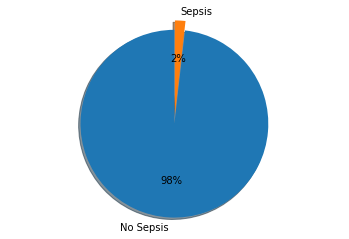

In [ ]:
labels = 'No Sepsis', 'Sepsis'
sizes = [no_sepsis_percent, sepsis_percent]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.0f%%', shadow=True, startangle = 90)
ax1.axis('equal')

#plt.savefig('/content/saved_figures/percent_sepsis.png')
plt.show()

Checking the missingness of original data

In [ ]:
# Sum of all missing values in dataset
missing_data = data.isnull().sum()
missing_data

HR                   153404
O2Sat                202746
Temp                1027028
SBP                  226277
MAP                  193282
DBP                  486608
Resp                 238339
EtCO2               1494628
BaseExcess          1468112
HCO3                1487234
FiO2                1422895
pH                  1444684
PaCO2               1465957
SaO2                1498699
AST                 1527080
BUN                 1445694
Alkalinephos        1527322
Calcium             1460931
Chloride            1481796
Creatinine          1457646
Bilirubin_direct    1549274
Glucose             1286746
Lactate             1510818
Magnesium           1454311
Phosphate           1489961
Potassium           1407737
Bilirubin_total     1529122
TroponinI           1537483
Hct                 1414829
Hgb                 1437671
PTT                 1506565
WBC                 1452815
Fibrinogen          1542022
Platelets           1460053
Age                       0
Gender              

In [ ]:
# percentage of missingness
missing_percent = (missing_data/data.shape[0])*100
missing_percent

HR                   9.882597
O2Sat               13.061309
Temp                66.163230
SBP                 14.577224
MAP                 12.451619
DBP                 31.348276
Resp                15.354283
EtCO2               96.286972
BaseExcess          94.578757
HCO3                95.810635
FiO2                91.665786
pH                  93.069478
PaCO2               94.439928
SaO2                96.549234
AST                 98.377596
BUN                 93.134544
Alkalinephos        98.393186
Calcium             94.116143
Chloride            95.460308
Creatinine          93.904516
Bilirubin_direct    99.807378
Glucose             82.894791
Lactate             97.329964
Magnesium           93.689669
Phosphate           95.986314
Potassium           90.689277
Bilirubin_total     98.509145
TroponinI           99.047778
Hct                 91.146158
Hgb                 92.617686
PTT                 97.055978
WBC                 93.593293
Fibrinogen          99.340190
Platelets 

In [ ]:
import missingno as msno

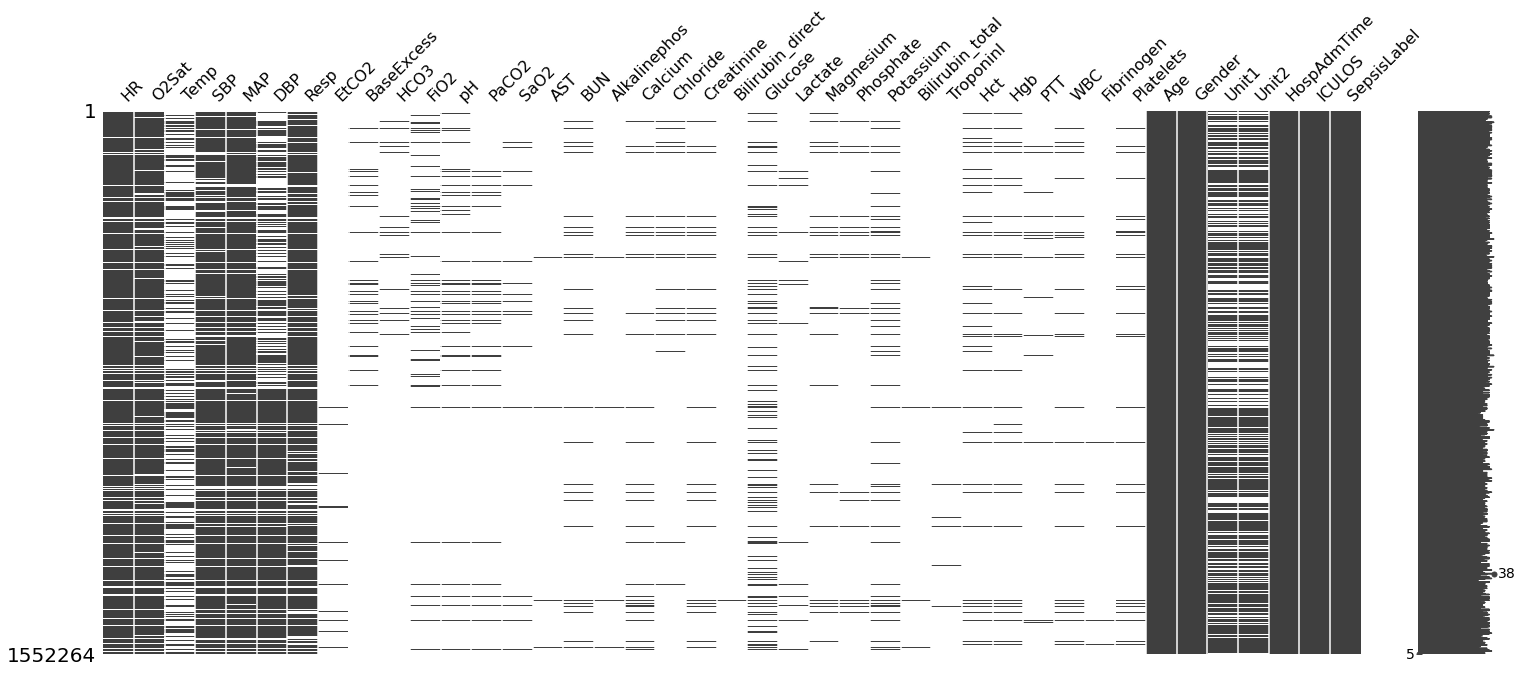

In [ ]:
msno.matrix(data)

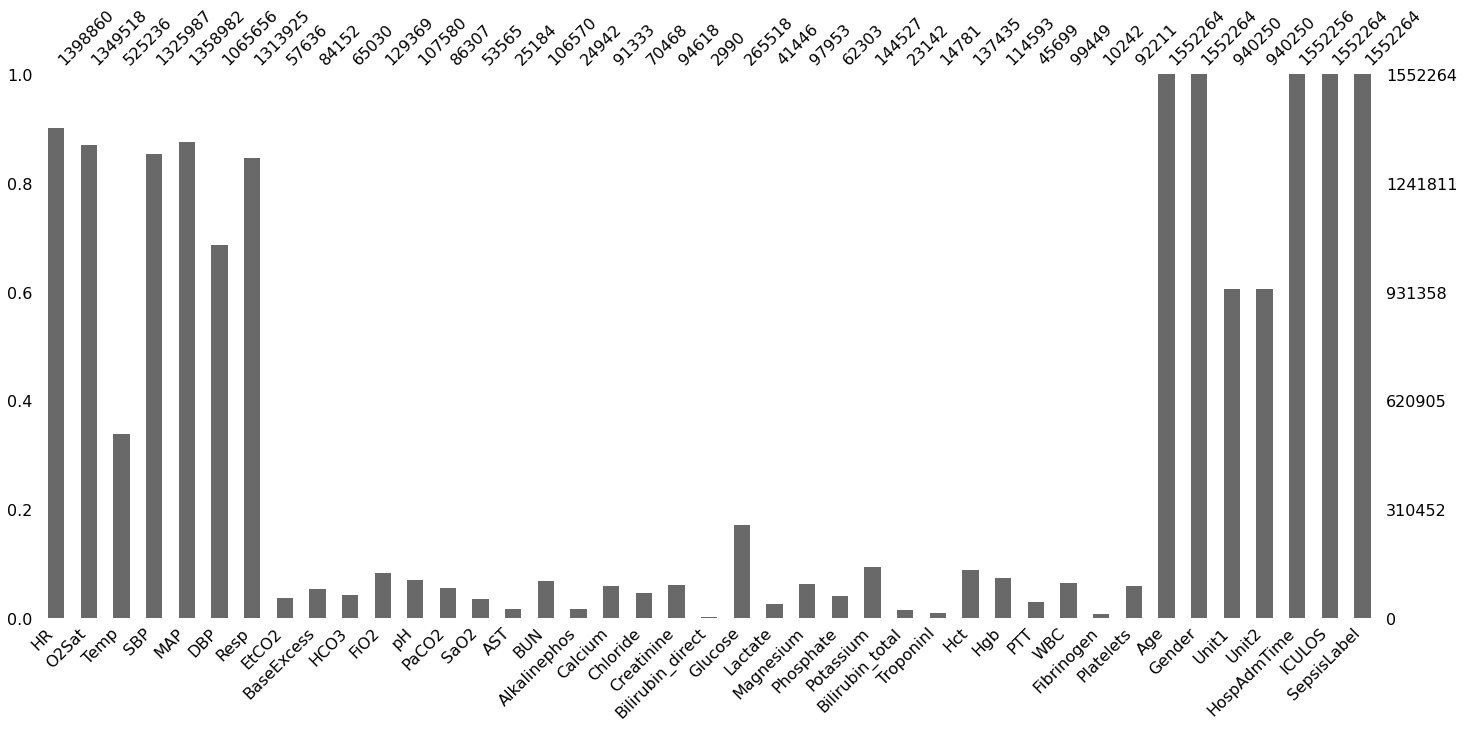

In [ ]:
msno.bar(data)

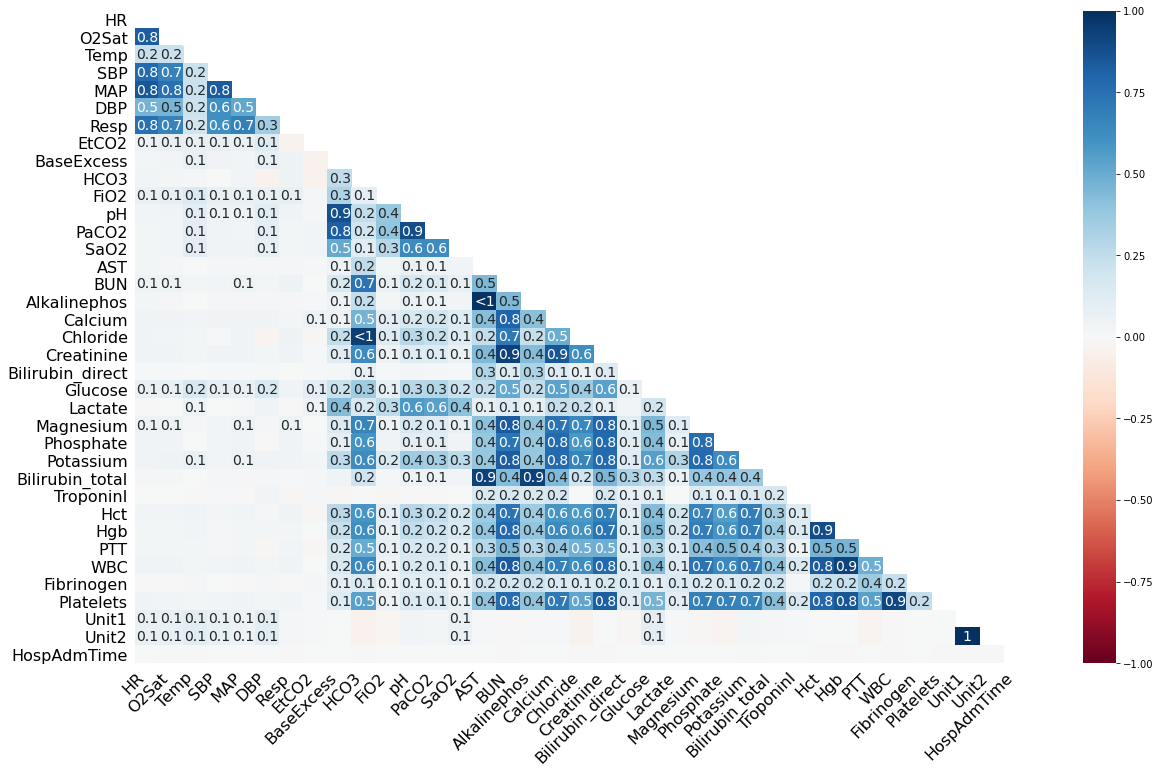

In [ ]:
msno.heatmap(data)

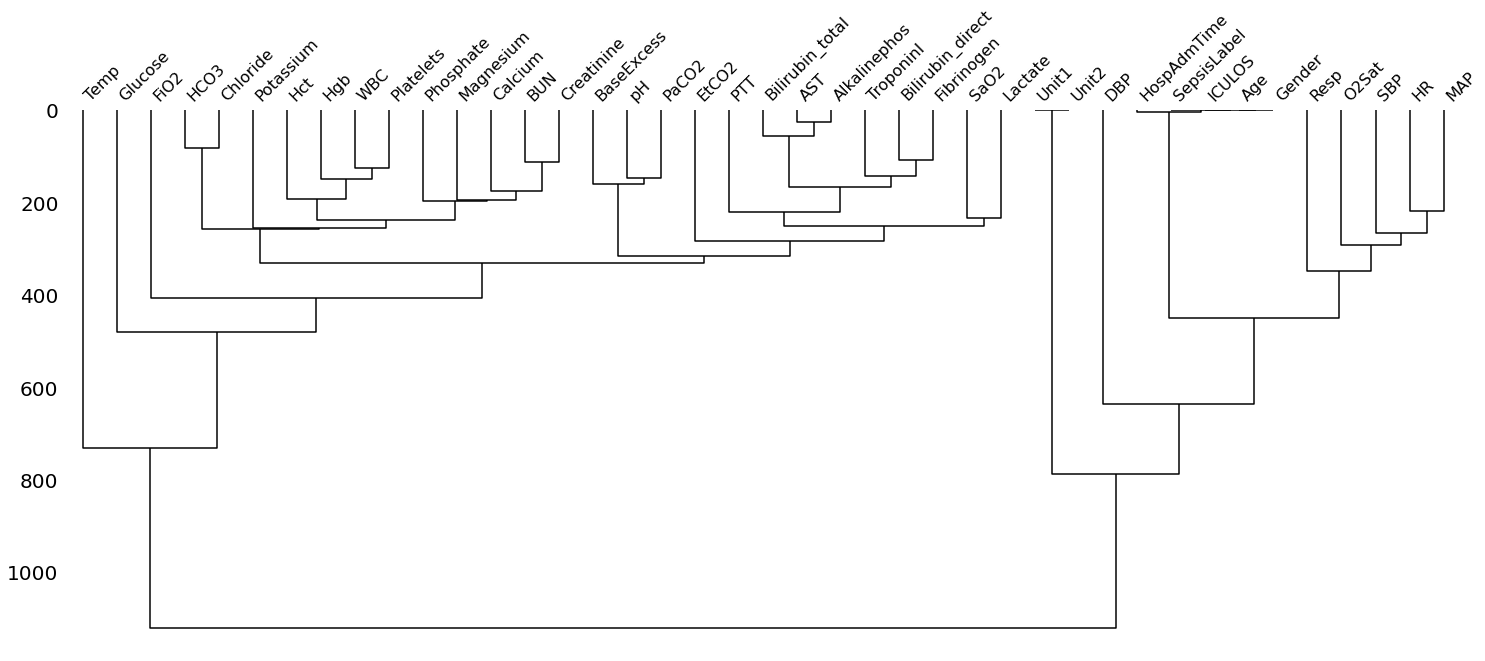

In [ ]:
msno.dendrogram(data)

In [ ]:
import seaborn as sns

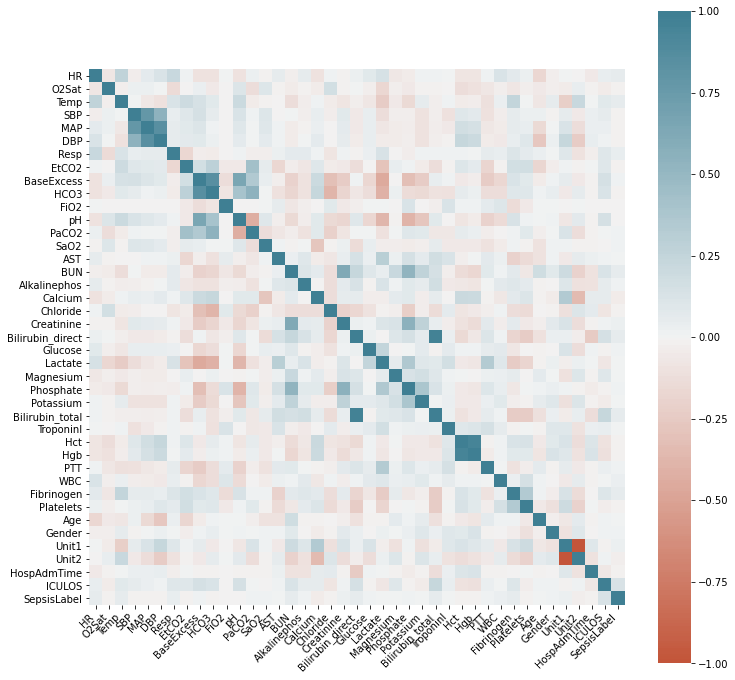

In [ ]:
fig = plt.figure(figsize=(12,12))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Positive Correlation - Sample scatter plot of DBP and MAP

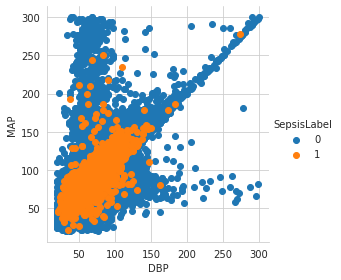

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='SepsisLabel', height=4).map(plt.scatter, 'DBP', 'MAP').add_legend()
plt.show()

**Dropping features with missing values more than 92%**

Importantce of each variable w.r.t Sepsis

Vital Signs :

1. HR (beats/min) - Heart Rate higher than 90 beats per minute
2. O2Sat (%) - Pulse oximetry
3. Temp (Deg C) - Temperature - Fever abover 101ºF (38ºC) or below 96.8ºF (36ºC)
4. SBP (mm Hg) - Systolic BP - Systolic Blood Pressure less than or equal to 100 mm of mercury
5. MAP (mm Hg) - Mean arterial pressure - persistent hypotension; MAP >65 mmHg.
6. DBP (mm Hg) - Diastolic BP
7. Resp (breaths per minute) - Respiration rate - Breathing rate higher than 20 breaths per min
8. EtCO2(mm Hg) - End tidal carbon dioxide - X

Lab values :

1. FiO2 Fraction of inspired oxygen (%) - FiO2 ≥ 0.60
2. Glucose Serum glucose (mg/dL)
3. Potassium (mmol/L)
4. Hct Hematocrit (%)
5. Hgb Hemoglobin (g/dL)

Get newer training sample labeled as sepsis_l92_data

In [ ]:
new_cols = list(missing_percent[missing_percent < 92].index)

In [ ]:
new_cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [ ]:
new_data = data[new_cols]

In [ ]:
new_missing_data = new_data.isnull().sum()
new_missing_percent = (new_missing_data/new_data.shape[0])*100
new_missing_percent

HR              9.882597
O2Sat          13.061309
Temp           66.163230
SBP            14.577224
MAP            12.451619
DBP            31.348276
Resp           15.354283
FiO2           91.665786
Glucose        82.894791
Potassium      90.689277
Hct            91.146158
Age             0.000000
Gender          0.000000
Unit1          39.427185
Unit2          39.427185
HospAdmTime     0.000515
ICULOS          0.000000
SepsisLabel     0.000000
dtype: float64

In [ ]:
new_df = new_data['SepsisLabel'].value_counts()
new_df

0    1524348
1      27916
Name: SepsisLabel, dtype: int64

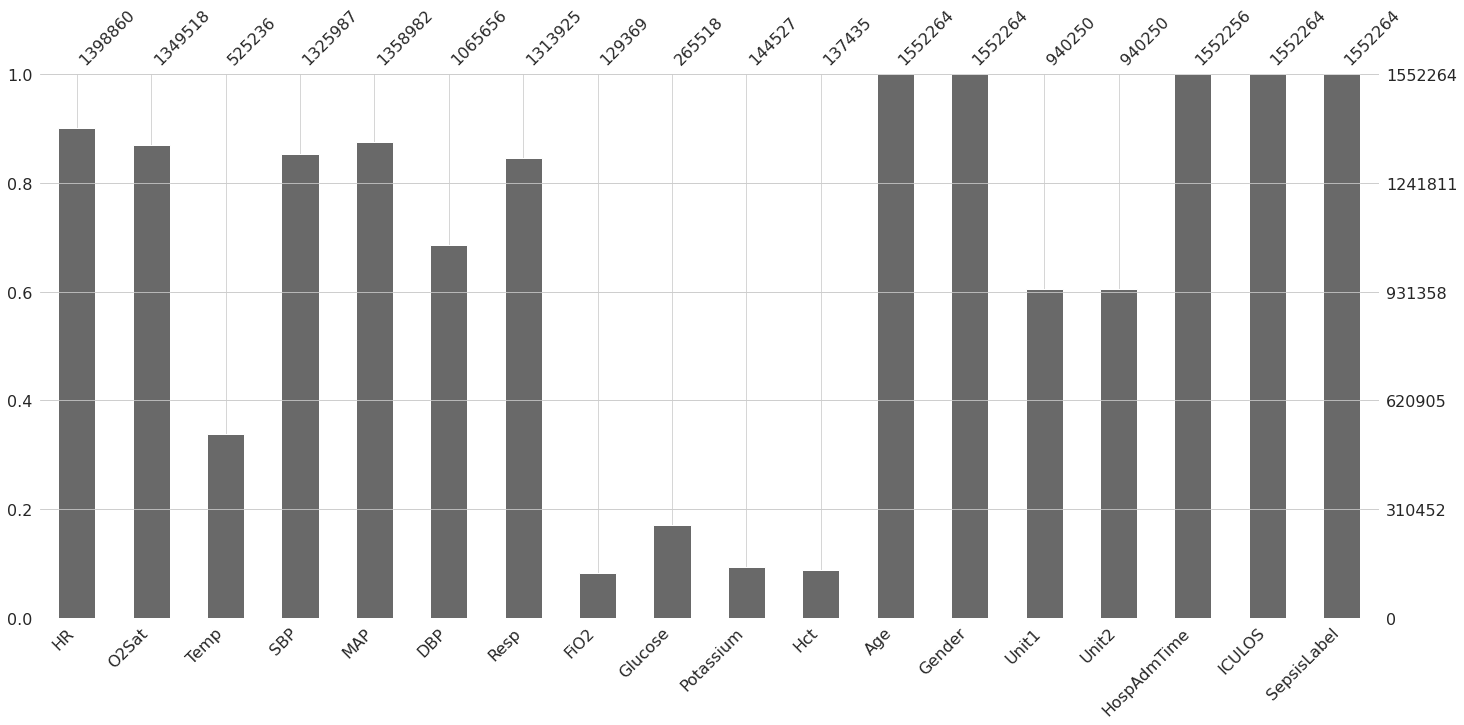

In [ ]:
msno.bar(new_data)

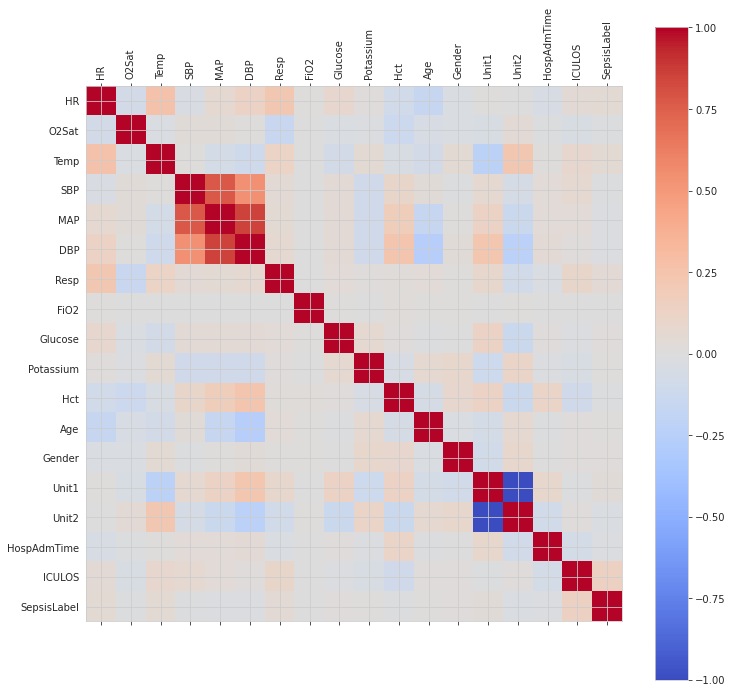

In [ ]:
corr = new_data.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(new_data.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(new_data.columns)
ax.set_yticklabels(new_data.columns)

#plt.savefig('/content/saved_figures/correlation_l92.png')
plt.show()

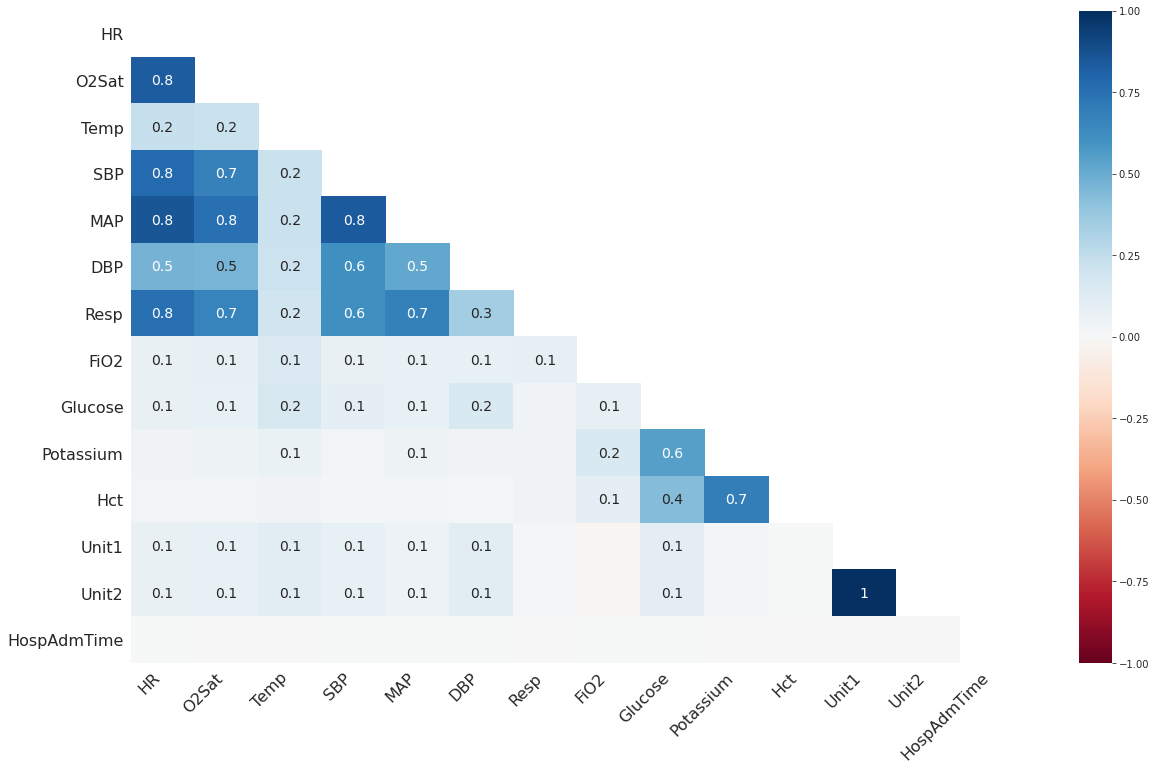

In [ ]:
msno.heatmap(new_data)

In [ ]:
new_data.describe(include = 'all')

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,1.398860e+06,1.349518e+06,525236.000000,1.325987e+06,1.358982e+06,1.065656e+06,1.313925e+06,129369.000000,265518.00000,144527.000000,137435.000000,1.552264e+06,1.552264e+06,940250.000000,940250.000000,1.552256e+06,1.552264e+06,1.552264e+06
mean,8.458204e+01,9.719377e+01,36.977224,1.237506e+02,8.240025e+01,6.383056e+01,1.872673e+01,0.554830,136.93248,4.135529,30.794179,6.201020e+01,5.592496e-01,0.496571,0.503429,-5.612317e+01,2.699501e+01,1.798405e-02
std,1.732532e+01,2.937123e+00,0.770009,2.323153e+01,1.634194e+01,1.395601e+01,5.098297e+00,11.123035,51.31065,0.642147,5.491755,1.638641e+01,4.964772e-01,0.499989,0.499989,1.622544e+02,2.900506e+01,1.328933e-01
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,-50.000000,10.00000,1.000000,5.500000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,0.400000,106.00000,3.700000,27.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00
50%,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,0.500000,127.00000,4.100000,30.300000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00
75%,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,0.600000,153.00000,4.400000,34.100000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,4000.000000,988.00000,27.500000,71.700000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00


**Understanding Demographics data**

In [ ]:
demo_data = new_data.dtypes == object
#demo_data['Age'] = True
demo_data['Unit1'] = True
demo_data['Unit2'] = True
demo_data['Gender'] = True
#demo_data['HospAdmTime'] = True
#demo_data['ICULOS'] = True
demo_data

HR             False
O2Sat          False
Temp           False
SBP            False
MAP            False
DBP            False
Resp           False
FiO2           False
Glucose        False
Potassium      False
Hct            False
Age            False
Gender          True
Unit1           True
Unit2           True
HospAdmTime    False
ICULOS         False
SepsisLabel    False
dtype: bool

In [ ]:
demo_list = list(demo_data[demo_data].index)

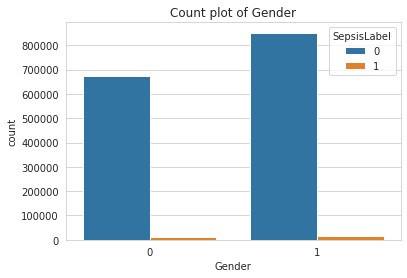

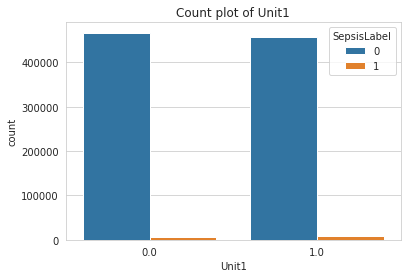

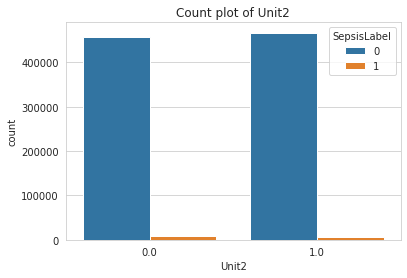

In [ ]:
for i,var in enumerate(demo_list):
    plt.figure(i)
    plt.title("Count plot of " + str(var))
    sns.countplot(x=new_data[var].dropna(), hue='SepsisLabel', data= new_data)

**To know more about Sepsis**

Resource: https://www.healthline.com/health/sepsis#symptoms

There are three stages of sepsis: sepsis, severe sepsis, and septic shock. Symptoms of Sepsis: 1. Fever abover 101ºF (38ºC) or below 96.8ºF (36ºC) <- Temp (ºC) 2. Heart Rate higher than 90 beats per minute <- HR (beats/min) 3. Breathing rate higher than 20 breaths per min <- Resp (breaths per minute) 4. Systolic Blood Pressure less than or equal to 100 mm of mercury <- SBP (mm Hg) 5. Arterial carbon dioxide tension of less than 32 mm Hg < - PaCO2 6. Abnormal White blood cell count ( >12000/mL or <4000//mL) <- WBC

Symptoms of Severe Sepsis and Septic Shock: 1. Platlet count is very low i.e below 80,000/mm3 <- Platlets (count*10^3/µL) 2. Very Low Blood Pressure. i.e less than 65 mm of mercury <- SBP (mm Hg) 3. Too much of lactic acid in your blood(serum lactate) after you have recieved adaquate fluid replacement. Having too much lactic acid in your blood means that your cells aren't using oxygen properly <- Lactate Lactic acid (mg/dL)

Sepsis is more common if:

Age - Infants (age < 5) or old (age > 80) <- Age
Weak Immune System
Have diabetes <- Contributing factors - Glucode Serum glucose (mg/dL)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4958885/

Interesting information :

Septic shock is defined as unrecovered hypotension despite adequate fluid replacement in the Surviving Sepsis Campaign (SSC) Guidelines

-->septic shock can be diagnosed under two conditions:

1. The first condition is persistent hypotension after fluid resuscitation and requiring vasopressors to maintain MAP >65 mmHg.

2. The second condition is serum lactate level >2 mmol/L.
increased serum lactate level may represent tissue hypoperfusion associated with signs of organ dysfunction in critically ill patients serum lactate level is found to be > 2 mmol/L



Contribution of Heart rate to sepsis?

In normal situations, heart rate varies, indicating the heart's capacity to adapt to different situations. HRV measures the oscillation of the intervals between consecutive heart beats, which are related to, the influences of the autonomic nervous system on the sinus node.

Patients with sepsis have reduced HRV compared to healthy patients, as demonstrated in small studies

In [ ]:
new_data = new_data.dropna(subset=['HospAdmTime'])

**Feature Engineering - Building newer features**

**1. Age**

Three categories -



*   Child - Age less than 10 year
*   Adult - Age more than 10 year and less than 60 years

*  Senior - Age more than 60


In [ ]:
def fe_new_age(data):
    data.loc[data['Age'] >=60, 'new_age'] = 'old'
    data.loc[data['Age'] <10, 'new_age'] = 'infant'
    data.loc[(data['Age'] >=10) & (data['Age'] <60),'new_age'] = 'adult'
    return data


In [ ]:
new_data = fe_new_age(new_data)

In [ ]:
new_data['new_age'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1552259    False
1552260    False
1552261    False
1552262    False
1552263    False
Name: new_age, Length: 1552264, dtype: bool

**2. Heart Rate**


The new feature designed for heart rate takes into account both Age and Heart Rate in a patient. It has three categories - normal, abnormal, missing

*   The 'normal' HR for a child (Age < 10) is in the range of 70 to 110 beats per minute.

*   The 'normal' HR for an adult and a senior (Age 10+) is in the range of 60 to 100
*   Any other values recorded is marked as 'abnormal'.


*   The value 'missing' is filled in place of null/nan values



In [ ]:
def fe_new_hr(data):
    data.loc[(data['HR'] >= 70) & (data['HR'] < 110 ) & (data['Age'] < 10), 'new_hr'] = 'normal'
    data.loc[(data['HR'] > 60) & (data['HR'] < 100) & data['Age'] >= 10, 'new_hr'] = 'normal'
    data.loc[((data['HR'] < 70) | (data['Age'] >= 110)) & (data['Age']<10), 'new_hr'] = 'abnormal'
    data.loc[(data['HR'] >= 100) & (data['Age'] >= 10), 'new_hr'] = 'abnormal'
    data['new_hr'].fillna('Missing', inplace=True)
    return data

In [ ]:
new_data = fe_new_hr(new_data)

**3. O2Sat**

The blood oxygen level measured with an oximeter is called your oxygen saturation level. This is a percentage of how much oxygen your blood is carrying compared to the maximum it is capable of carrying.

The new feature designed for pulse oximetry takes into three catogories


*  'Normal' is found to be between 95% - 100% in healthy children and adults alike

*  'Abnormal' is for anything otherwise
*  'Missing' is a null or nan case is observed

In [ ]:
def fe_new_o2sat(data):
    data.loc[(data['O2Sat'] >= 95) & (data['O2Sat'] < 100), 'new_o2sat'] = 'normal'
    data.loc[(data['O2Sat'] < 95) & (data['O2Sat'] >= 0), 'new_o2sat'] = 'abnormal'
    data['new_o2sat'].fillna('missing', inplace=True)
    return data

In [ ]:
new_data = fe_new_o2sat(new_data)

**4. Temperature**

The new feature designed for temperature takes into three categories:


*   Body temperature for any healthy person (child, adult and senior alike) is 'normal' when found between 36 Deg C to 38 Dec C.

*  Anything above or below this range is labeled as 'abnormal'
*  'Missing' is a null or nan case is observed



In [ ]:
def fe_new_temp(data):
    data.loc[(data['Temp'] >= 36) & (data['Temp'] < 38),'new_temp'] = 'normal'
    data.loc[(data['Temp'] < 36) | (data['Temp'] >= 38),'new_temp'] = 'abnormal'
    data['new_temp'].fillna('Missing', inplace=True)
    return data

In [ ]:
new_data = fe_new_temp(new_data)

**5. Blood Pressure**

We will be combining two forms of Blood Pressure here - Systolic blood pressure (SBP) and Diastolic Blood Pressure(DBP) in the dataset.



*   SBP - When your heart beats, it squeezes and pushes blood through your arteries to the rest of your body. This force creates pressure on those blood vessels, and that's your systolic blood pressure

*  DBP - The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen.

*  The new feature will compare the two BP and according to the below table categorize into four categories - low, normal, elevated and high, and missing


In [ ]:
def fe_new_bp(data):
    data.loc[(data['SBP'] < 90) & (data['DBP'] < 60), 'new_bp'] = 'low'
    data.loc[(data['SBP'].between(90,120, inclusive=True)) & (data['DBP'].between(60,80, inclusive=True)), 'new_bp'] = 'normal'
    data.loc[(data['SBP'].between(120,140, inclusive=True)) & (data['DBP'].between(80,90, inclusive=True)),'new_bp'] = 'elevated'
    data.loc[(data['SBP'] > 140 ) & (data['DBP'] > 90 ), 'new_bp'] = 'high'
    data['new_bp'].fillna('Missing', inplace=True)
    return data

In [ ]:
new_data = fe_new_bp(new_data)

**6. Respiration Rate**

The new feature designed will have 3 categories - normal, abnormal and missing. The normal respiratory rate for different age groups are as shown below:

**a.** For healthy adults (Age > 18) is between 12 and 20 breaths per minute.

**b.** Normal respiratory rates for children in breaths per minute are as follows:



  *   birth to 1 year: 30 to 60
  *   1 to 3 years: 24 to 40
  *   3 to 6 years: 22 to 34
  *   6 to 12 years: 18 to 30
  *   12 to 18 years: 12 to 16


**c.**  Any other range for respiratory rates are labeled as 'abnormal' and the missing values are labeled as 'missing'




In [ ]:
def fe_new_resp(data):
    data.loc[(data['Resp'].between(30, 60)) & (data['Age'] < 1), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(24, 40)) & (data['Age'].between(1, 3)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(22, 34)) & (data['Age'].between(3, 6)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(18, 30)) & (data['Age'].between(6, 12)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(12, 16)) & (data['Age'].between(12, 18)), 'new_resp'] = 'normal'  
    data.loc[(data['Resp'].between(12, 20)) & (data['Age'] > 18), 'new_resp'] = 'normal'  
    
    data.loc[((data['Resp'] < 30) | (data['Resp'] > 60)) & (data['Age'] <1) ,'new_resp'] = 'abnormal'   
    data.loc[((data['Resp'] < 24) | (data['Resp'] > 40)) & (data['Age'].between(1, 3)) ,'new_resp'] = 'abnormal'   
    data.loc[((data['Resp'] < 22) | (data['Resp'] > 34)) & (data['Age'].between(3, 6)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 18) | (data['Resp'] > 30)) & (data['Age'].between(6, 12)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 16)) & (data['Age'].between(12, 18)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 20)) & (data['Age'] > 18) ,'new_resp'] = 'abnormal'
    
    
    data['new_resp'].fillna('missing', inplace = True)
                                                            
    return data
    

In [ ]:
new_data = fe_new_resp(new_data)

**7. Mean Arterial Pressure**

https://emtprep.com/free-training/post/map-understanding-mean-arterial-pressure

MAP is the measurement that explains the average blood pressure in a person's blood vessels during a single cardiac cycle. Mean arterial pressure is significant because it measures the pressure necessary for adequate perfusion of the organs of the body.

The normal MAP range is between 70 and 100 mmHg.


*   High MAP can cause stress on the heart because it has to work harder than normal to push against the elevated pressure in the vessels.
*   When the MAP gets below 60, vital organs in the body do not get the nourishment they need for survival




MAP is directly affected by factors such as:

• Amount of blood pumped out of the heart per minute (cardiac output)

• Heart rate (beats per minute)

• Blood pressure

• Resistance to blood flow in the vessels

A change in any of these factors will alter the mean arterial pressure and cause negative effects on the body

In [ ]:
def fe_new_map(data):
    data.loc[(data['MAP'] >= 70) & (data['MAP'] < 100),'new_map'] = 'normal'
    data.loc[(data['MAP'] < 70) | (data['MAP'] >= 100),'new_map'] = 'abnormal'
    data['new_map'].fillna('Missing', inplace=True)
    return data

In [ ]:
new_data = fe_new_map(new_data)

**8. Fraction of inspired oxygen**

The percentage of individual gases in air (oxygen, nitrogen, etc.) doesn't change with altitude, but the atmospheric (or barometric) pressure does. FIO2, the fraction of inspired oxygen in the air, is thus 21% (or .21) throughout the breathable atmosphere.

In [ ]:
def fe_new_fio2(data):
    data.loc[(data['FiO2'] < 0.8 ) ,'new_fio2'] = 'normal'
    data.loc[(data['FiO2'] >= 0.8 ),'new_fio2'] = 'abnormal'
    data['new_fio2'].fillna('Missing', inplace=True)
    return data

In [ ]:
new_data = fe_new_fio2(new_data)

Check if all the new columns are correct

In [ ]:
new_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,new_age,new_hr,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,old,Missing,missing,Missing,Missing,missing,Missing,Missing
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,old,Missing,normal,Missing,Missing,normal,normal,Missing
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,old,Missing,normal,Missing,Missing,abnormal,normal,Missing
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,old,Missing,normal,Missing,Missing,abnormal,Missing,Missing
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,0.28,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,old,abnormal,abnormal,Missing,Missing,abnormal,normal,normal


In [ ]:
new_data.shape

(1552264, 26)

**Feature Selection - Selecting relevant features for prediction**

In [ ]:
columns_new = ['Gender', 'new_age', 'new_o2sat', 'new_temp', 'new_bp', 'new_resp', 'new_map', 'new_fio2', 'new_hr', 'HospAdmTime', 'ICULOS']


In [ ]:
target_col = ['SepsisLabel']

all_selected_cols = columns_new + target_col


In [ ]:
new_featured_data = new_data[all_selected_cols]

In [ ]:
new_featured_data.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
0,0,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-0.03,1,0
1,0,old,normal,Missing,Missing,normal,normal,Missing,Missing,-0.03,2,0
2,0,old,normal,Missing,Missing,abnormal,normal,Missing,Missing,-0.03,3,0
3,0,old,normal,Missing,Missing,abnormal,Missing,Missing,Missing,-0.03,4,0
4,0,old,abnormal,Missing,Missing,abnormal,normal,normal,abnormal,-0.03,5,0


In [ ]:
new_featured_data.shape

(1552264, 12)

**Encoding Data-using One hot encoding approach**

In [ ]:
ed_new_age = pd.get_dummies(new_featured_data.new_age, prefix='new_age')
ed_new_age.head()

,new_age_adult,new_age_old
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
ed_new_o2sat = pd.get_dummies(new_featured_data.new_o2sat, prefix='new_o2sat')
ed_new_o2sat.head()

,new_o2sat_abnormal,new_o2sat_missing,new_o2sat_normal
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [ ]:
ed_new_temp = pd.get_dummies(new_featured_data.new_temp, prefix='new_temp')
ed_new_temp.head()

,new_temp_Missing,new_temp_abnormal,new_temp_normal
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
ed_new_bp = pd.get_dummies(new_featured_data.new_bp, prefix='new_bp')
ed_new_bp.head()

,new_bp_Missing,new_bp_elevated,new_bp_high,new_bp_low,new_bp_normal
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [ ]:
ed_new_resp = pd.get_dummies(new_featured_data.new_resp, prefix='new_resp')
ed_new_resp.head()

,new_resp_abnormal,new_resp_missing,new_resp_normal
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
ed_new_map = pd.get_dummies(new_featured_data.new_map, prefix='new_map')
ed_new_map.head()

,new_map_Missing,new_map_abnormal,new_map_normal
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
ed_new_fio2 = pd.get_dummies(new_featured_data.new_fio2, prefix='new_fio2')
ed_new_fio2.head()

,new_fio2_Missing,new_fio2_abnormal,new_fio2_normal
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [ ]:
ed_new_hr = pd.get_dummies(new_featured_data.new_hr, prefix='new_hr')
ed_new_hr.head()

,new_hr_Missing,new_hr_abnormal
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
new_featured_encoded_data=pd.concat([ed_new_age, ed_new_o2sat, ed_new_temp, ed_new_bp, ed_new_resp, ed_new_map, ed_new_fio2, ed_new_hr, new_featured_data['Gender'], new_featured_data['HospAdmTime'], new_featured_data['ICULOS'], new_featured_data['SepsisLabel'] ],axis=1)
new_featured_encoded_data.head()

,new_age_adult,new_age_old,new_o2sat_abnormal,new_o2sat_missing,new_o2sat_normal,new_temp_Missing,new_temp_abnormal,new_temp_normal,new_bp_Missing,new_bp_elevated,new_bp_high,new_bp_low,new_bp_normal,new_resp_abnormal,new_resp_missing,new_resp_normal,new_map_Missing,new_map_abnormal,new_map_normal,new_fio2_Missing,new_fio2_abnormal,new_fio2_normal,new_hr_Missing,new_hr_abnormal,Gender,HospAdmTime,ICULOS,SepsisLabel
0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,-0.03,1,0
1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,-0.03,2,0
2,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,-0.03,3,0
3,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,-0.03,4,0
4,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,-0.03,5,0


In [ ]:
new_featured_encoded_data.shape

(1552264, 28)

In [ ]:
new_featured_encoded_data.isna().sum()

new_age_adult         0
new_age_old           0
new_o2sat_abnormal    0
new_o2sat_missing     0
new_o2sat_normal      0
new_temp_Missing      0
new_temp_abnormal     0
new_temp_normal       0
new_bp_Missing        0
new_bp_elevated       0
new_bp_high           0
new_bp_low            0
new_bp_normal         0
new_resp_abnormal     0
new_resp_missing      0
new_resp_normal       0
new_map_Missing       0
new_map_abnormal      0
new_map_normal        0
new_fio2_Missing      0
new_fio2_abnormal     0
new_fio2_normal       0
new_hr_Missing        0
new_hr_abnormal       0
Gender                0
HospAdmTime           8
ICULOS                0
SepsisLabel           0
dtype: int64

**Imputing missing data using Simple Imputer**

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
new_featured_encoded_data['HospAdmTime']=imputer.fit_transform(new_featured_encoded_data['HospAdmTime'].values.reshape(-1,1))[:,0]

In [ ]:
new_featured_encoded_data.isna().sum()

new_age_adult         0
new_age_old           0
new_o2sat_abnormal    0
new_o2sat_missing     0
new_o2sat_normal      0
new_temp_Missing      0
new_temp_abnormal     0
new_temp_normal       0
new_bp_Missing        0
new_bp_elevated       0
new_bp_high           0
new_bp_low            0
new_bp_normal         0
new_resp_abnormal     0
new_resp_missing      0
new_resp_normal       0
new_map_Missing       0
new_map_abnormal      0
new_map_normal        0
new_fio2_Missing      0
new_fio2_abnormal     0
new_fio2_normal       0
new_hr_Missing        0
new_hr_abnormal       0
Gender                0
HospAdmTime           0
ICULOS                0
SepsisLabel           0
dtype: int64

In [ ]:
#new_featured_encoded_data.to_csv ('new_processed_sepsis_data.csv', index = None, header=True)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

In [3]:
new_featured_encoded_data=pd.read_csv('/content/new_processed_sepsis_data.csv')

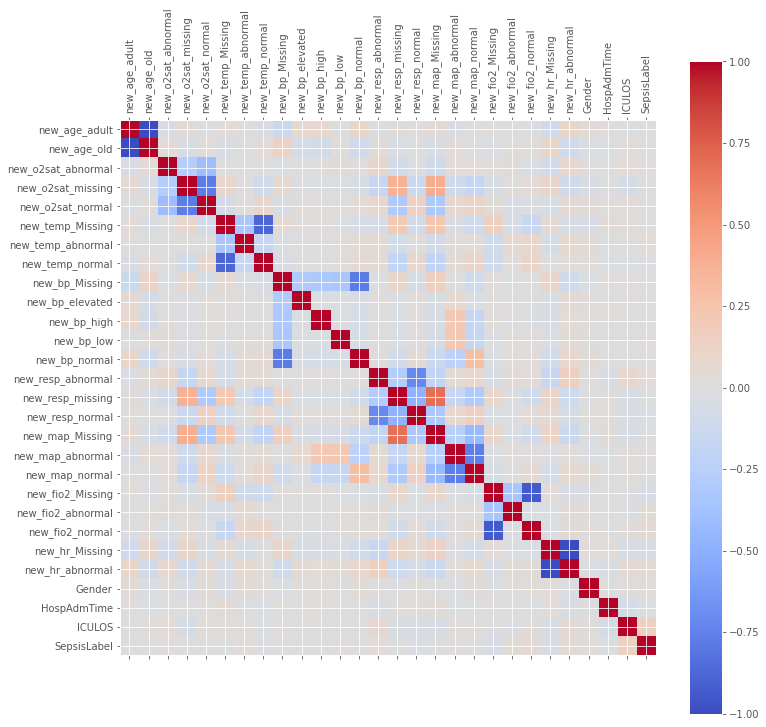

In [5]:
corr = new_featured_encoded_data.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(new_featured_encoded_data.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(new_featured_encoded_data.columns)
ax.set_yticklabels(new_featured_encoded_data.columns)
plt.show()

From above correlation matrix, we can see that there is a significant correlation between independent features, so we have to drop some independent features so that we can remove redundancy from the data.

In [7]:
new_featured_encoded_data.columns

Index(['new_age_adult', 'new_age_old', 'new_o2sat_abnormal',
       'new_o2sat_missing', 'new_o2sat_normal', 'new_temp_Missing',
       'new_temp_abnormal', 'new_temp_normal', 'new_bp_Missing',
       'new_bp_elevated', 'new_bp_high', 'new_bp_low', 'new_bp_normal',
       'new_resp_abnormal', 'new_resp_missing', 'new_resp_normal',
       'new_map_Missing', 'new_map_abnormal', 'new_map_normal',
       'new_fio2_Missing', 'new_fio2_abnormal', 'new_fio2_normal',
       'new_hr_Missing', 'new_hr_abnormal', 'Gender', 'HospAdmTime', 'ICULOS',
       'SepsisLabel'],
      dtype='object')

In [8]:
new_featured_encoded_data1=new_featured_encoded_data.drop(['new_age_adult','new_o2sat_missing','new_temp_Missing','new_bp_Missing','new_resp_missing','new_map_Missing','new_fio2_Missing','new_hr_Missing'],axis=1)

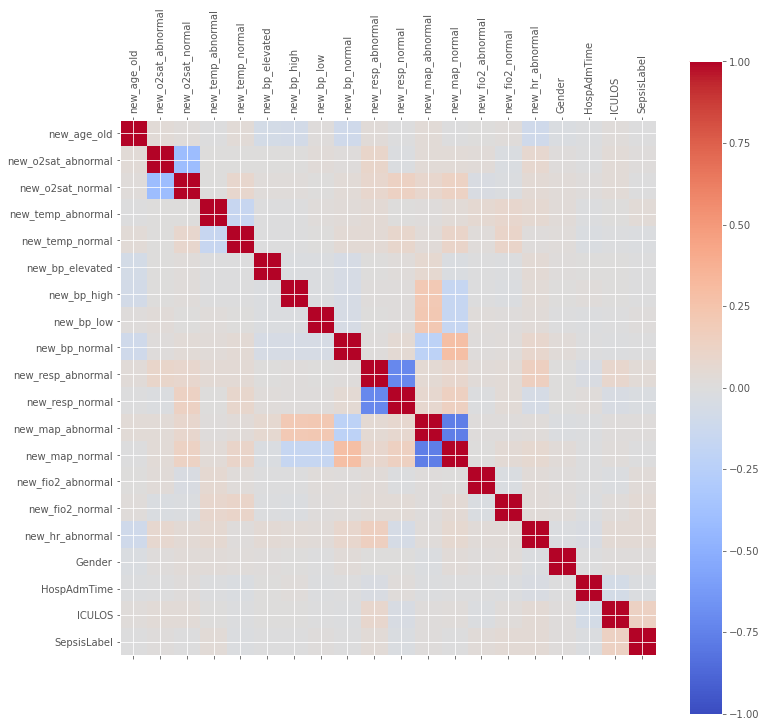

In [9]:
corr = new_featured_encoded_data1.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(new_featured_encoded_data1.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(new_featured_encoded_data1.columns)
ax.set_yticklabels(new_featured_encoded_data1.columns)
plt.show()

In [10]:
#new_featured_encoded_data1.to_csv ('new_processed_sepsis_data1.csv', index = None, header=True)

In [11]:
new_featured_encoded_data1.columns

Index(['new_age_old', 'new_o2sat_abnormal', 'new_o2sat_normal',
       'new_temp_abnormal', 'new_temp_normal', 'new_bp_elevated',
       'new_bp_high', 'new_bp_low', 'new_bp_normal', 'new_resp_abnormal',
       'new_resp_normal', 'new_map_abnormal', 'new_map_normal',
       'new_fio2_abnormal', 'new_fio2_normal', 'new_hr_abnormal', 'Gender',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [12]:
new_featured_cols = ['new_age_old', 'new_o2sat_abnormal', 'new_o2sat_normal',
       'new_temp_abnormal', 'new_temp_normal', 'new_bp_elevated',
       'new_bp_high', 'new_bp_low', 'new_bp_normal', 'new_resp_abnormal',
       'new_resp_normal', 'new_map_abnormal', 'new_map_normal',
       'new_fio2_abnormal', 'new_fio2_normal', 'new_hr_abnormal', 'Gender',
       'HospAdmTime', 'ICULOS']
target_col = ['SepsisLabel']

all_selected_cols = new_featured_cols + target_col

**Splitting Data into Train & Test**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_featured_encoded_data1[new_featured_cols], new_featured_encoded_data1[target_col], \
                                                    test_size = 0.25, random_state = 0, shuffle=True) # split into 75:25 ratio

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1164198, 19), (388066, 19), (1164198, 1), (388066, 1))

In [15]:
sepsis_count = y_train.loc[y_train['SepsisLabel'] == 1].count()
non_sepsis_count = y_train.loc[y_train['SepsisLabel'] == 0].count()
sepsis_count, non_sepsis_count

(SepsisLabel    20907
 dtype: int64, SepsisLabel    1143291
 dtype: int64)

For sepsis patients, SepsisLabel is 1.

For non-sepsis patients, SepsisLabel is 0.

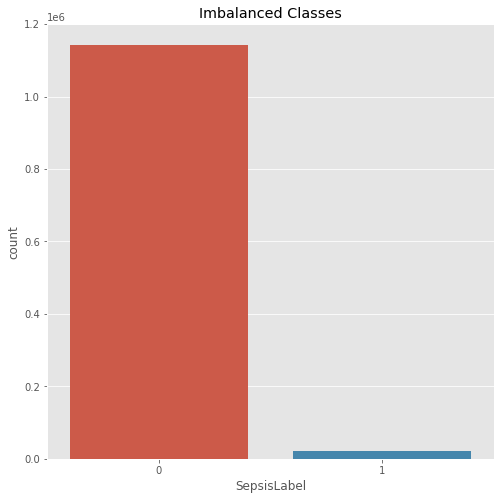

In [16]:
plt.figure(figsize=(8, 8))
sns.countplot(x='SepsisLabel', data=y_train)
plt.title('Imbalanced Classes')
plt.show()

**Balancing Data with SMOTE oversampling Technique**

In [17]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [19]:
sm = SMOTE(random_state=2)

In [ ]:
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

In [21]:
oversampled_train = pd.concat([pd.DataFrame(y_train_oversampled), pd.DataFrame(X_train_oversampled)], axis=1)

In [22]:
oversampled_train

,0,new_age_old,new_o2sat_abnormal,new_o2sat_normal,new_temp_abnormal,new_temp_normal,new_bp_elevated,new_bp_high,new_bp_low,new_bp_normal,new_resp_abnormal,new_resp_normal,new_map_abnormal,new_map_normal,new_fio2_abnormal,new_fio2_normal,new_hr_abnormal,Gender,HospAdmTime,ICULOS
0,0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,-0.010000,39.000000
1,0,1.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.000000,25.000000
2,0,1.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.000000,1.000000,-0.030000,38.000000
3,0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,-51.670000,11.000000
4,0,1.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0,1.0,1.000000,0.000000,-8.980000,82.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286577,1,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0,1.0,0.812287,0.812287,-0.052491,81.187713
2286578,1,0.0,0.366558,0.000000,0.0,0.633442,0.0,0.0,0.0,0.0,0.0,1.0,0.366558,0.633442,0.0,0.0,0.000000,1.000000,-15.950000,22.366558
2286579,1,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.0,0.232392,0.232392,-0.020000,82.000000
2286580,1,0.0,0.415932,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.415932,0.584068,-12.371861,36.415932


In [23]:
oversampled_train=oversampled_train.rename(columns={0: 'SepsisLabel'})

In [24]:
oversampled_train

,SepsisLabel,new_age_old,new_o2sat_abnormal,new_o2sat_normal,new_temp_abnormal,new_temp_normal,new_bp_elevated,new_bp_high,new_bp_low,new_bp_normal,new_resp_abnormal,new_resp_normal,new_map_abnormal,new_map_normal,new_fio2_abnormal,new_fio2_normal,new_hr_abnormal,Gender,HospAdmTime,ICULOS
0,0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,-0.010000,39.000000
1,0,1.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.000000,25.000000
2,0,1.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.000000,1.000000,-0.030000,38.000000
3,0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,-51.670000,11.000000
4,0,1.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0,1.0,1.000000,0.000000,-8.980000,82.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286577,1,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0,1.0,0.812287,0.812287,-0.052491,81.187713
2286578,1,0.0,0.366558,0.000000,0.0,0.633442,0.0,0.0,0.0,0.0,0.0,1.0,0.366558,0.633442,0.0,0.0,0.000000,1.000000,-15.950000,22.366558
2286579,1,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.0,0.232392,0.232392,-0.020000,82.000000
2286580,1,0.0,0.415932,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.415932,0.584068,-12.371861,36.415932


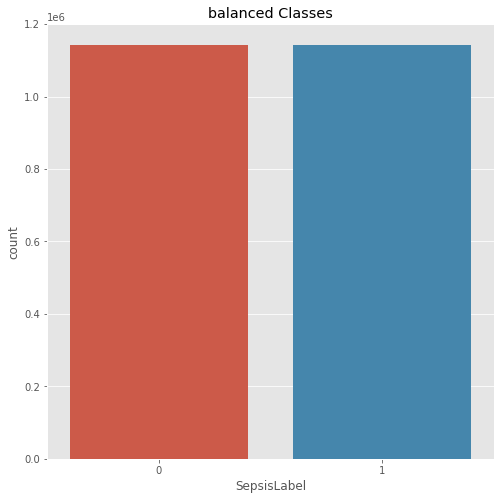

In [25]:
plt.figure(figsize=(8, 8))
sns.countplot(x='SepsisLabel', data=oversampled_train)
plt.title('balanced Classes')
plt.show()

In [26]:
oversampled_train.dtypes

SepsisLabel             int64
new_age_old           float64
new_o2sat_abnormal    float64
new_o2sat_normal      float64
new_temp_abnormal     float64
new_temp_normal       float64
new_bp_elevated       float64
new_bp_high           float64
new_bp_low            float64
new_bp_normal         float64
new_resp_abnormal     float64
new_resp_normal       float64
new_map_abnormal      float64
new_map_normal        float64
new_fio2_abnormal     float64
new_fio2_normal       float64
new_hr_abnormal       float64
Gender                float64
HospAdmTime           float64
ICULOS                float64
dtype: object

**Importing Necessary Packages**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import precision_score, accuracy_score, recall_score, \
average_precision_score, precision_recall_curve, confusion_matrix
from subprocess import call
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

**Applying Different Classification Techniques**

**1. Logistic Regression Classifier**

In [28]:
clf= LogisticRegression( C= 0.01, solver = 'lbfgs', dual=False)
log_reg_model=clf.fit(X_train_oversampled, y_train_oversampled)

In [29]:
predicted = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix

array([[288084,  92973],
       [  2833,   4176]])

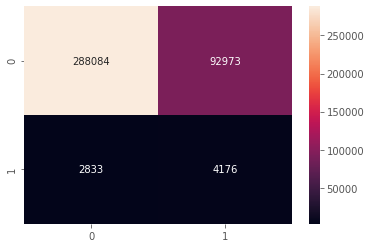

In [30]:
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [31]:
def score_model(model, metric_list, y_true, y_pred):
    metric_dict = {'precision' :  precision_score, 'recall' : recall_score, 
                 'confusion_matrix' : confusion_matrix, 
                 'avg_precision': average_precision_score,
                  'accuracy_score': accuracy_score}
    df = pd.DataFrame()
    df['model'] = [model]
    for metric in metric_list:
        df[metric] = [metric_dict[metric](y_true, y_pred)]
    return df


In [32]:
score_model('Logistic_regression', ['recall','precision', 'avg_precision', 'accuracy_score'],y_test, predicted)

,model,recall,precision,avg_precision,accuracy_score
0,Logistic_regression,0.595805,0.042986,0.032911,0.753119


**2. KNeighbors Classifier**

In [33]:
knn=KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(X_train_oversampled, y_train_oversampled)


In [34]:
predicted = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix

array([[356073,  24984],
       [  3775,   3234]])

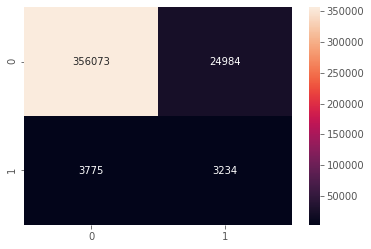

In [35]:
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [36]:
score_model('KNeighbors', ['recall','precision', 'avg_precision', 'accuracy_score'],y_test, predicted)

,model,recall,precision,avg_precision,accuracy_score
0,KNeighbors,0.461407,0.114608,0.062608,0.925891


**3. Decision Tree Classifier**

In [37]:
dtree = DecisionTreeClassifier(random_state=0)
dtree_model=dtree.fit(X_train_oversampled, y_train_oversampled)

We are here checking both training and testing accuracy because decision trees are generally prone to overfitting.


In [42]:
predicted = dtree.predict(X_train_oversampled)
conf_matrix = confusion_matrix(y_train_oversampled, predicted)
conf_matrix

array([[1139287,    4004],
       [   7642, 1135649]])

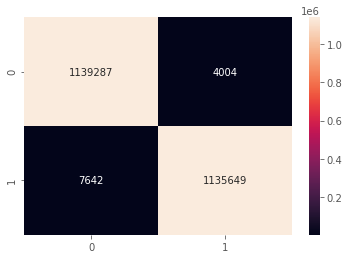

In [43]:
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [44]:
score_model('Decision_Tree_Training', ['recall','precision', 'avg_precision', 'accuracy_score'],y_train_oversampled, predicted)

,model,recall,precision,avg_precision,accuracy_score
0,Decision_Tree_Training,0.993316,0.996487,0.993168,0.994907


In [45]:
predicted = dtree.predict(X_test)
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix

array([[374248,   6809],
       [  5393,   1616]])

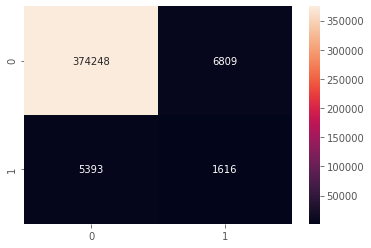

In [46]:
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [47]:
score_model('Decision_Tree_Testing', ['recall','precision', 'avg_precision', 'accuracy_score'],y_test, predicted)

,model,recall,precision,avg_precision,accuracy_score
0,Decision_Tree_Testing,0.230561,0.19181,0.058121,0.968557


From Above results we can see that the model is not overfitted. So, we can got with it.

**4. Gaussian Naive Bayes Classifier**

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_classifier = gnb.fit(X_train_oversampled, y_train_oversampled)

In [51]:
predicted = gnb.predict(X_test)
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix

array([[293502,  87555],
       [  2967,   4042]])

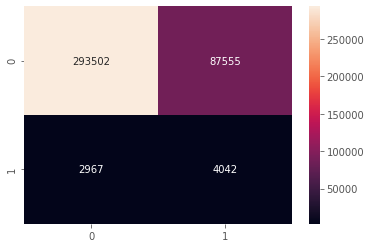

In [52]:
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [53]:
score_model('Gaussian_Naive_Bayes', ['recall','precision', 'avg_precision', 'accuracy_score'],y_test, predicted)

,model,recall,precision,avg_precision,accuracy_score
0,Gaussian_Naive_Bayes,0.576687,0.044128,0.033094,0.766736


In [54]:
lr_score=score_model('Logistic_regression', ['recall','precision', 'avg_precision', 'accuracy_score'],y_test, clf.predict(X_test))
knn_score=score_model('KNeighbors', ['recall','precision', 'avg_precision', 'accuracy_score'],y_test, knn.predict(X_test))
dtree_score=score_model('Decision_Tree', ['recall','precision', 'avg_precision', 'accuracy_score'],y_test, dtree.predict(X_test))
gnb_score=score_model('Gaussian Naive Bayes', ['recall','precision', 'avg_precision', 'accuracy_score'],y_test, gnb.predict(X_test))

In [55]:
results=pd.concat([lr_score, knn_score, dtree_score, gnb_score],axis=0)
results

,model,recall,precision,avg_precision,accuracy_score
0,Logistic_regression,0.595805,0.042986,0.032911,0.753119
0,KNeighbors,0.461407,0.114608,0.062608,0.925891
0,Decision_Tree,0.230561,0.191810,0.058121,0.968557
0,Gaussian Naive Bayes,0.576687,0.044128,0.033094,0.766736


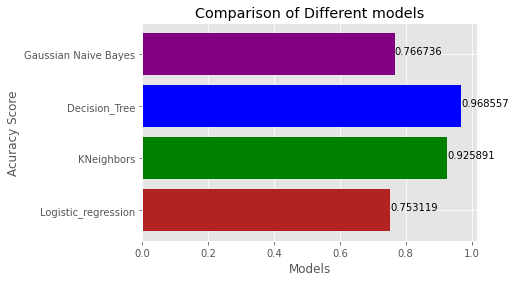

In [76]:
plt.barh(results['model'],results['accuracy_score'], color=['firebrick', 'green', 'blue', 'purple', 'red'])
plt.xlabel('Models')
plt.ylabel("Acuracy Score")
plt.title('Comparison of Different models')
for index, value in enumerate(results['accuracy_score']):
    plt.text(value, index, str(f'{value:.6f}'))
plt.show()

**Saving the best model for later use**

In [68]:
import pickle
filename = 'best_model_dtree.sav'
pickle.dump(dtree_model, open(filename, 'wb'))

In [ ]:
"""
#For later use

filepath = '/content/best_model_dtree.sav'
#load the model from disk

loaded_model = pickle.load(open(filepath, 'rb'))

result = loaded_model.score(X_test, Y_test)

print(result)
"""